In [6]:
library(dtw)
library(readxl)

df <- read_excel("oxa-181_single_events020518b.xlsx")

In [7]:
df

sequence,vol(nm^3),k=9 (model),X__1,"Event 36, Dt=2.9ms, I0=-439.2pA",Event 36-I0,X__2,Ev28 Dt=3.2ms,X__3,X__4,⋯,Ev16 Dt=6.5ms,X__9,X__10,Ev7 Dt=2.2ms,X__11,X__12,"Ev33 Dt=2.9ms, I0=-495",X__13,X__14,Ev19 Dt=3.8ms
M,0.1708,NA,NA,-332.8662,106.33382,NA,-15.60368,NA,NA,⋯,-200.9412,NA,NA,-208.2704,NA,NA,-7.34222,NA,NA,-8.941964
G,0.0664,NA,NA,-346.8261,92.37387,NA,-33.69260,NA,NA,⋯,-216.2475,NA,NA,-215.0211,NA,NA,-15.75181,NA,NA,-19.490254
H,0.1673,NA,NA,-357.4948,81.70519,NA,-53.91563,NA,NA,⋯,-221.5520,NA,NA,-220.6436,NA,NA,-25.09069,NA,NA,-31.339680
N,0.1352,NA,NA,-364.8500,74.34997,NA,-75.83275,NA,NA,⋯,-217.9536,NA,NA,-225.1222,NA,NA,-35.18778,NA,NA,-44.106817
H,0.1673,NA,NA,-368.9701,70.22987,NA,-98.93198,NA,NA,⋯,-207.7255,NA,NA,-228.4605,NA,NA,-45.84438,NA,NA,-57.351086
N,0.1352,NA,NA,-370.0281,69.17193,NA,-122.64983,NA,NA,⋯,-193.8213,NA,NA,-230.6813,NA,NA,-56.84062,NA,NA,-70.599789
H,0.1673,NA,NA,-368.2821,70.91794,NA,-146.39427,NA,NA,⋯,-179.2892,NA,NA,-231.8256,NA,NA,-67.94284,NA,NA,-83.375434
N,0.1352,NA,NA,-364.0631,75.13689,NA,-169.56912,NA,NA,⋯,-166.6870,NA,NA,-231.9513,NA,NA,-78.91145,NA,NA,-95.223442
H,0.1673,0.1457778,NA,-357.7601,81.43988,NA,-191.59868,NA,NA,⋯,-157.7490,NA,NA,-231.1317,NA,NA,-89.50918,NA,NA,-105.738362
N,0.1352,0.1418222,NA,-349.8032,89.39681,NA,-211.95133,NA,NA,⋯,-153.1341,NA,NA,-229.4531,NA,NA,-99.50914,NA,NA,-114.586766


In [138]:
seq1 <- df[["k=9 (model)"]]

k <- seq1[9:290]
Ev36 <- df[["Event 36-I0"]]
Ev33 <- df[["Ev33 Dt=2.9ms, I0=-495"]] + 495
Ev28 <- df[["Ev28 Dt=3.2ms"]]
Ev16 <- df[["Ev16 Dt=6.5ms"]]
Ev7 <- df[["Ev7 Dt=2.2ms"]]
Ev19 <- df[["Ev19 Dt=3.8ms"]]

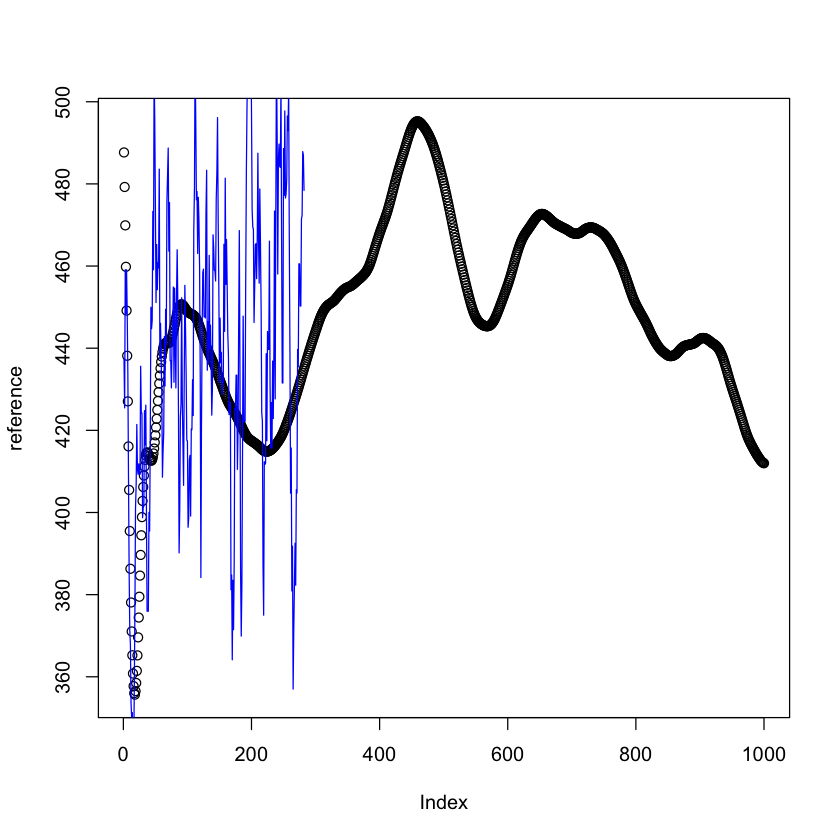

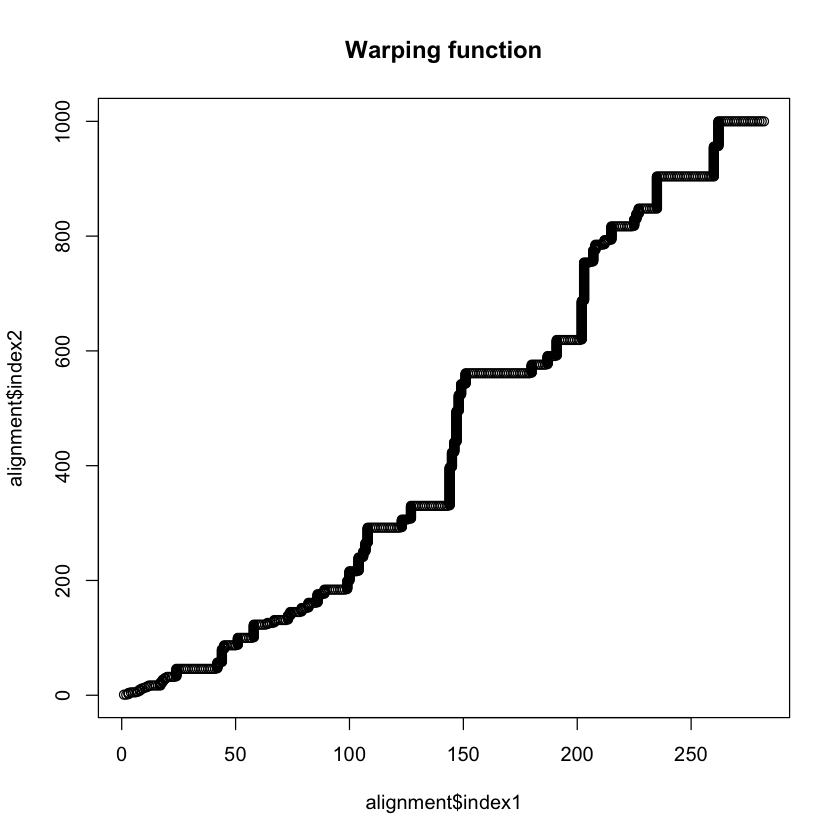

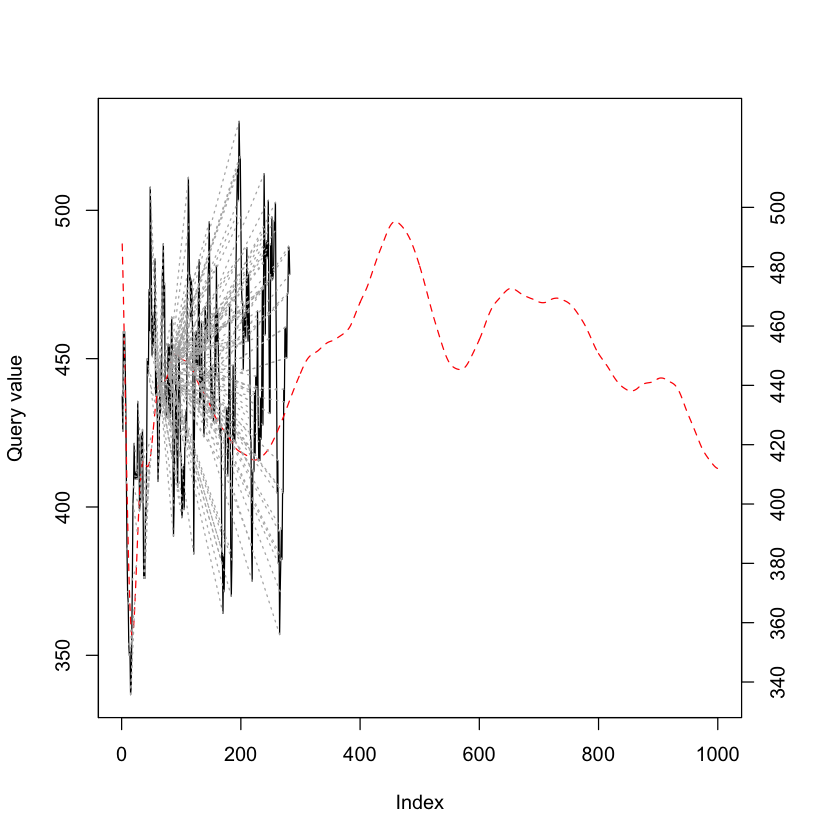

In [152]:
query<-k*3000
reference<-Ev33[1:1000]

# Plot Signals
plot(reference); lines(query,col="blue");
# Calculate and plot alignment
alignment<-dtw(query,reference);
# alignment <- dtw(query,reference,keep=TRUE,step=asymmetric,open.end=TRUE,open.begin=TRUE);
plot(alignment$index1,alignment$index2,main="Warping function");
#Calculate and plot partial alignment
alignmentp <- dtw(query,reference,keep=TRUE,step=asymmetric,open.end=TRUE,open.begin=TRUE);
plot(alignmentp,type="two",off=1);



## Examples of DTW package for reference


dtw> ## A noisy sine wave as query
dtw> idx<-seq(0,6.28,len=100);

dtw> query<-sin(idx)+runif(100)/10;

dtw> ## A cosine is for reference; sin and cos are offset by 25 samples
dtw> reference<-cos(idx)

dtw> plot(reference); lines(query,col="blue");

dtw> ## Find the best match
dtw> alignment<-dtw(query,reference);

dtw> ## Display the mapping, AKA warping function - may be multiple-valued
dtw> ## Equivalent to: plot(alignment,type="alignment")
dtw> plot(alignment$index1,alignment$index2,main="Warping function");


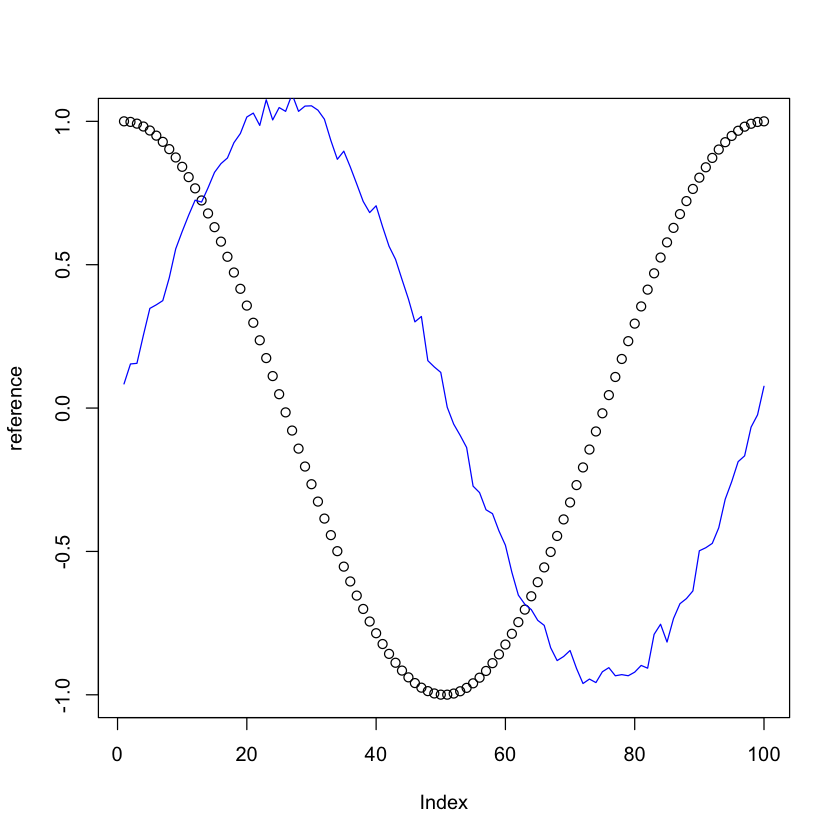


dtw> ## Confirm: 25 samples off-diagonal alignment
dtw> lines(1:100-25,col="red")

dtw> #########
dtw> ##
dtw> ## Partial alignments are allowed.
dtw> ##
dtw> 
dtw> alignmentOBE <-
dtw+   dtw(query[44:88],reference,
dtw+       keep=TRUE,step=asymmetric,
dtw+       open.end=TRUE,open.begin=TRUE);

dtw> plot(alignmentOBE,type="two",off=1);


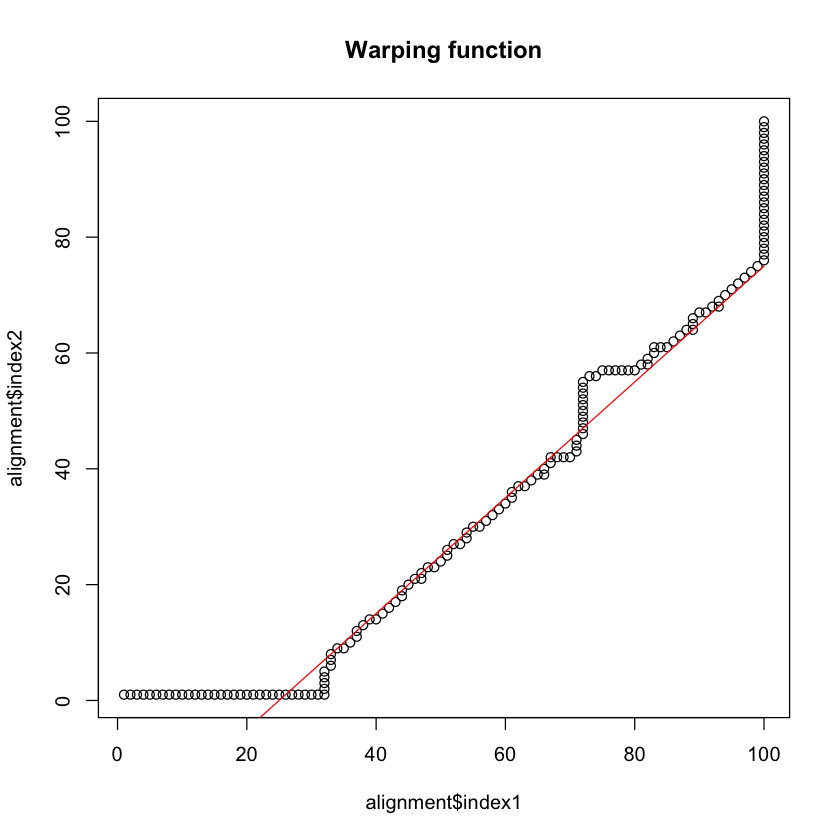


dtw> #########
dtw> ##
dtw> ## Subsetting allows warping and unwarping of
dtw> ## timeseries according to the warping curve. 
dtw> ## See first example below.
dtw> ##
dtw> 
dtw> ## Most useful: plot the warped query along with reference 
dtw> plot(reference)


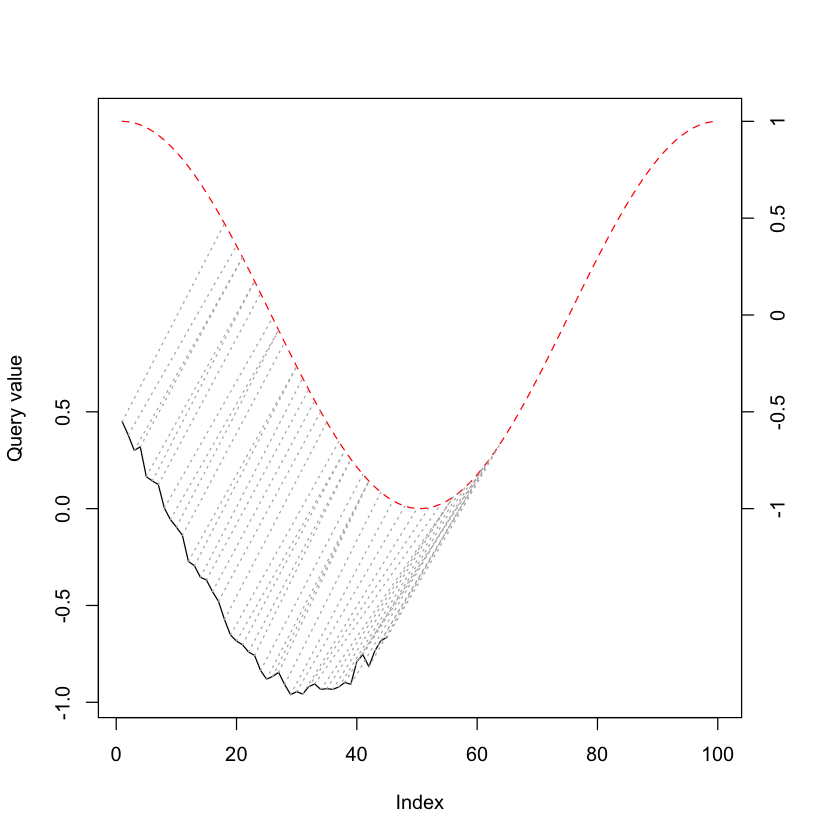


dtw> lines(query[alignment$index1]~alignment$index2,col="blue")

dtw> ## Plot the (unwarped) query and the inverse-warped reference
dtw> plot(query,type="l",col="blue")


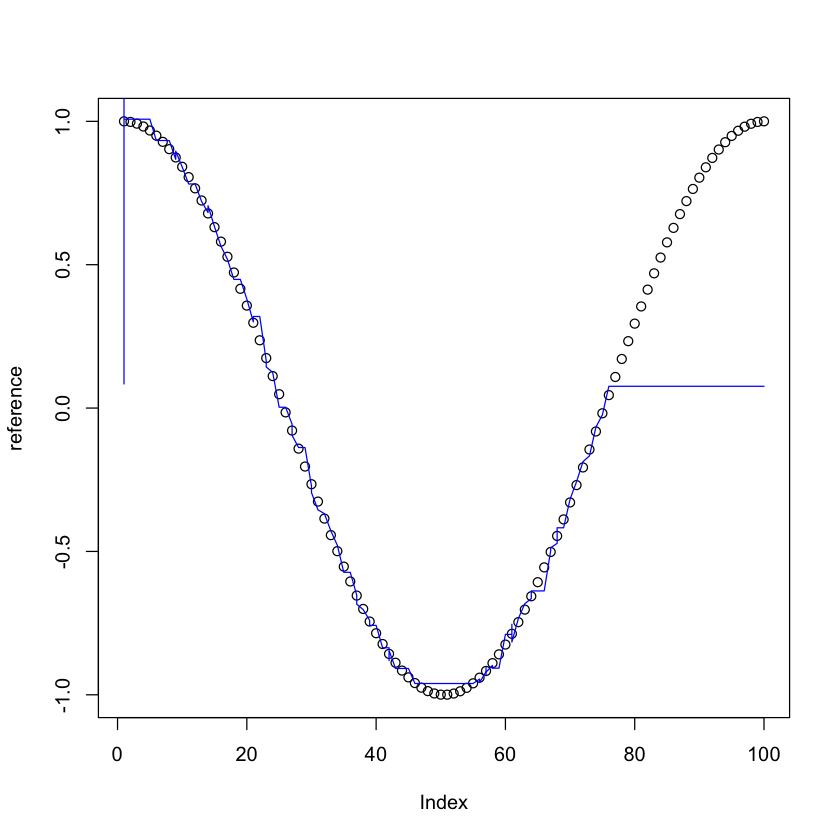


dtw> points(reference[alignment$index2]~alignment$index1)

dtw> #########
dtw> ##
dtw> ## Contour plots of the cumulative cost matrix
dtw> ##    similar to: plot(alignment,type="density") or
dtw> ##                dtwPlotDensity(alignment)
dtw> ## See more plots in ?plot.dtw 
dtw> ##
dtw> 
dtw> ## keep = TRUE so we can look into the cost matrix
dtw> 
dtw> alignment<-dtw(query,reference,keep=TRUE);

dtw> contour(alignment$costMatrix,col=terrain.colors(100),x=1:100,y=1:100,
dtw+ 	xlab="Query (noisy sine)",ylab="Reference (cosine)");


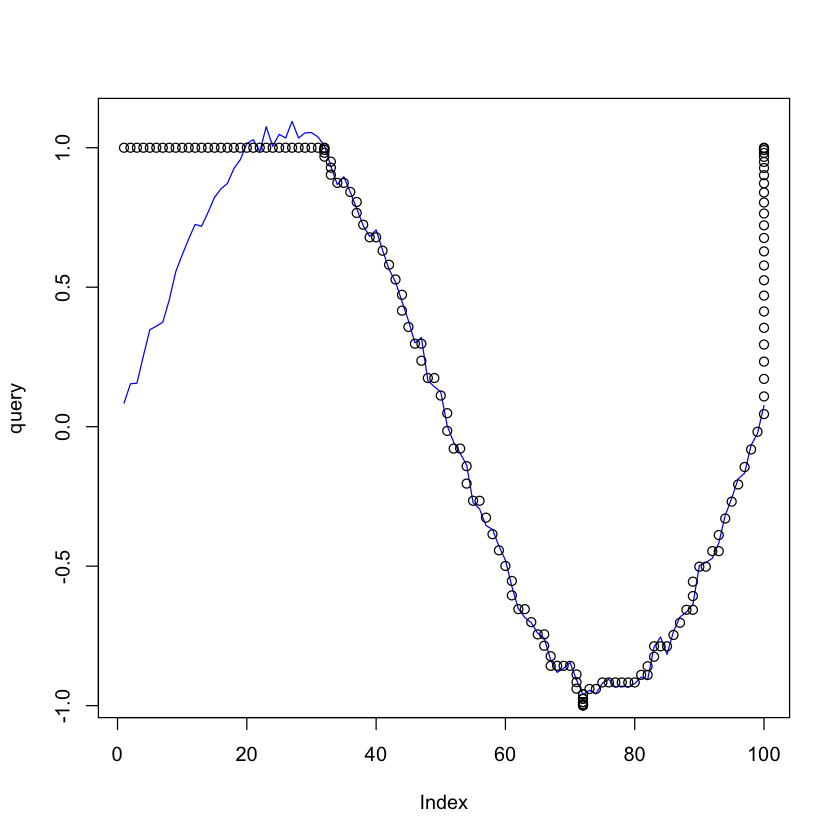


dtw> lines(alignment$index1,alignment$index2,col="red",lwd=2);

dtw> #########
dtw> ##
dtw> ## An hand-checkable example
dtw> ##
dtw> 
dtw> ldist<-matrix(1,nrow=6,ncol=6);  # Matrix of ones

dtw> ldist[2,]<-0; ldist[,5]<-0;      # Mark a clear path of zeroes

dtw> ldist[2,5]<-.01;		 # Forcely cut the corner

dtw> ds<-dtw(ldist);			 # DTW with user-supplied local

dtw>                                  #   cost matrix
dtw> da<-dtw(ldist,step=asymmetric);	 # Also compute the asymmetric 

dtw> plot(ds$index1,ds$index2,pch=3); # Symmetric: alignment follows


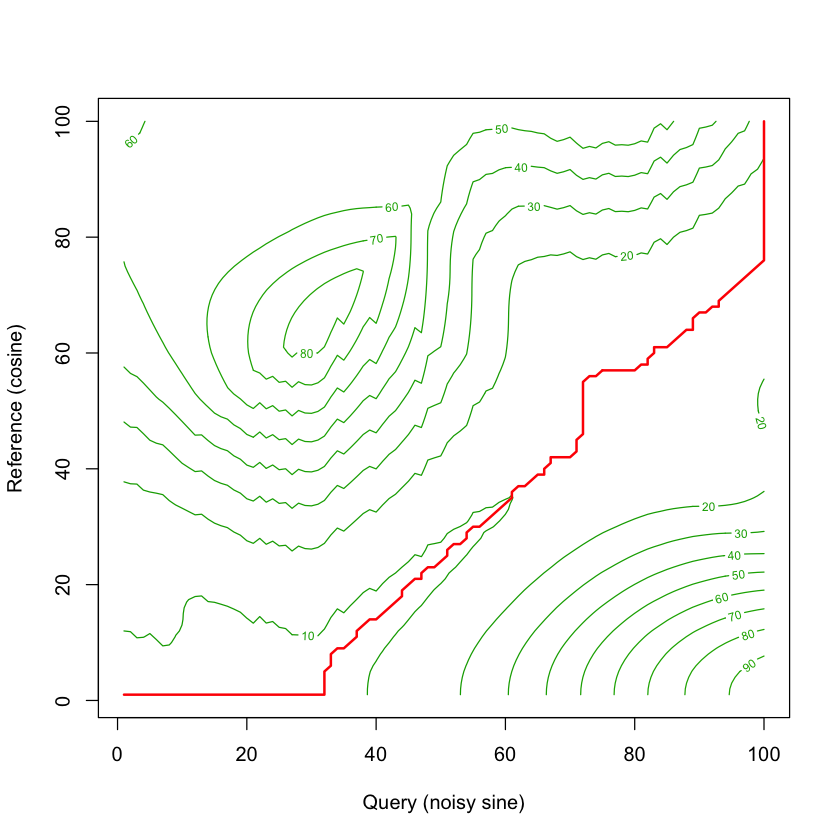


dtw>                                  #   the low-distance marked path
dtw> points(da$index1,da$index2,col="red");  # Asymmetric: visiting

dtw>                                         #   1 is required twice
dtw> 
dtw> ds$distance;
[1] 2

dtw> da$distance;
[1] 2


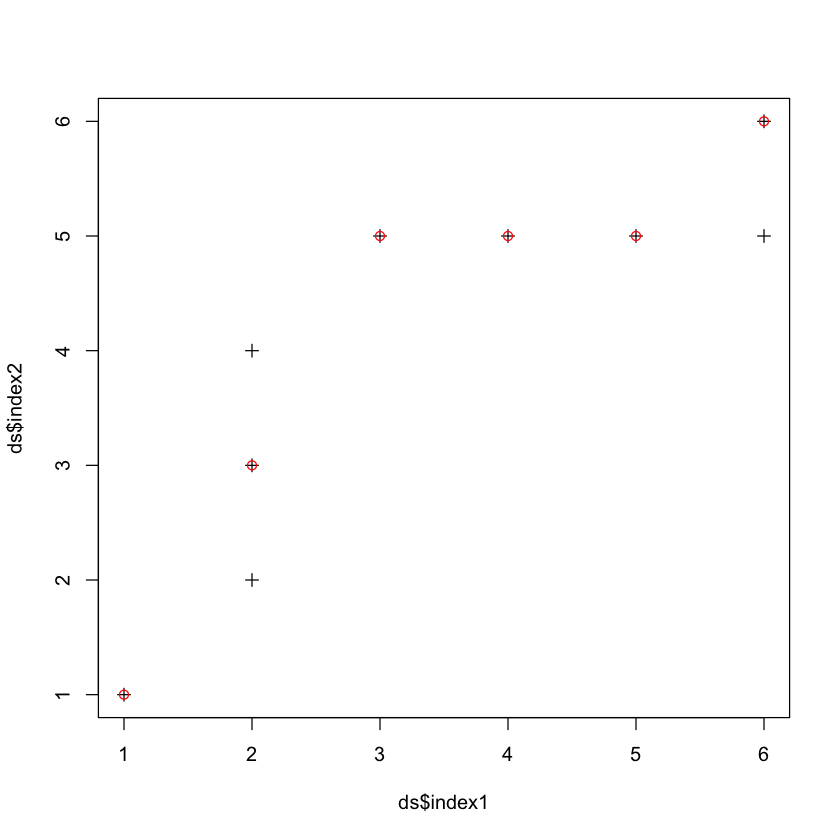

In [2]:
example(dtw)